In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Formatting options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
np.set_printoptions(suppress = True, linewidth = 120, edgeitems = 5)
sns.set_theme(style="whitegrid")



In [2]:
# 1. Load data and view structure

dataPath = "../Data/Raw/parsed_books_data.tsv"

df = pd.read_csv(dataPath, sep = "\t", na_values = ["NA"])

sampleCount, featureCount = df.shape

print(f"Total samples:    {sampleCount}")
print(f"Total features:   {featureCount}")
print("-" * 30)
print("Columns:", df.columns.tolist())

print("-" * 30)
display(df.head())


Total samples:    5283
Total features:   24
------------------------------
Columns: ['price', 'title', 'rating', 'num_ratings', 'num_reviews', 'num_pages', 'genres', 'publication_year', 'author', 'author_book_count', 'author_followers_count', 'five_star_count', 'five_star_percentage', 'four_star_count', 'four_star_percentage', 'three_star_count', 'three_star_percentage', 'two_star_count', 'two_star_percentage', 'one_star_count', 'one_star_percentage', 'votes', 'category', 'award_year']
------------------------------


,price,title,rating,num_ratings,num_reviews,num_pages,genres,publication_year,author,author_book_count,author_followers_count,five_star_count,five_star_percentage,four_star_count,four_star_percentage,three_star_count,three_star_percentage,two_star_count,two_star_percentage,one_star_count,one_star_percentage,votes,category,award_year
0,14.99,The Wedding People,4.16,327019,38667,384.0,Fiction|Romance|Audiobook|Contemporary|Literar...,2024,Alison Espach,8,2416.0,123227,37,144585,44,48565,14,8388,2,2254,0,94733,Fiction,2024
1,14.99,Intermezzo,3.93,171506,31312,454.0,Fiction|Contemporary|Literary Fiction|Romance|...,2024,Sally Rooney,43,61500.0,53605,31,68660,40,36424,21,9842,5,2975,1,67268,Fiction,2024
2,9.13,Welcome to the Hyunam-Dong Bookshop,3.97,49745,9574,307.0,Contemporary|Books About Books|Audiobook|Cozy|...,2022,Hwang Bo-Reum,3,740.0,15568,31,20267,40,11063,22,2367,4,480,0,51958,Fiction,2024
3,13.99,Blue Sisters,3.98,140226,19902,342.0,Fiction|Contemporary|Literary Fiction|Audioboo...,2024,Coco Mellors,5,5253.0,43785,31,60355,43,27337,19,7508,5,1241,0,50659,Fiction,2024
4,14.99,Here One Moment,4.05,146803,16125,512.0,Fiction|Audiobook|Mystery|Contemporary|Thrille...,2024,Liane Moriarty,42,71800.0,49893,33,62470,42,27770,18,5392,3,1278,0,48432,Fiction,2024


In [3]:
# 2. Data integrity

zeroPriceCount = (df['price'] == 0).sum()
naPriceCount = df['price'].isna().sum()

print(f"Duplicated rows: {df.duplicated().sum()}")
print("Missing values per column:")
print("-" * 30)
missingInfo = df.isnull().sum()
print(missingInfo[missingInfo > 0])
print("-" * 30)
print(f"Books with price 0:       {zeroPriceCount}")
print(f"Books with price 'NA':    {naPriceCount}")

Duplicated rows: 0
Missing values per column:
------------------------------
price                     2031
num_pages                   16
author_followers_count       5
dtype: int64
------------------------------
Books with price 0:       438
Books with price 'NA':    2031


In [4]:
print("Unique values per column:")
print(df.nunique())

Unique values per column:
price                      140
title                     5036
rating                     155
num_ratings               4956
num_reviews               3952
num_pages                  668
genres                    4724
publication_year            23
author                    3106
author_book_count          343
author_followers_count    2085
five_star_count           4644
five_star_percentage        74
four_star_count           4702
four_star_percentage        42
three_star_count          4292
three_star_percentage       41
two_star_count            2974
two_star_percentage         22
one_star_count            1961
one_star_percentage         13
votes                     4463
category                    31
award_year                  14
dtype: int64


In [ ]:
# 3. Feature types

In [17]:
# 4. Quartiles and statistics
print(df.describe())

             price  publication_year  author_book_count  author_followers_count  five_star_count  five_star_percentage  four_star_count  four_star_percentage  three_star_count  three_star_percentage  two_star_count  two_star_percentage  one_star_count  one_star_percentage          votes   award_year
count  3252.000000       5283.000000        5283.000000             5278.000000     5.283000e+03           5283.000000     5.283000e+03           5283.000000       5283.000000            5283.000000     5283.000000          5283.000000     5283.000000          5283.000000    5283.000000  5283.000000
mean      9.616307       2017.040507          93.177740            27791.738916     4.400922e+04             36.872610     3.777893e+04             36.570509      18294.973311              18.702442     4591.783078             4.203294     1743.743517             1.153511   10358.620102  2017.152376
std       5.002347          3.993684         262.105106            87762.918476     1.492183e+05 

Number of genres: 456


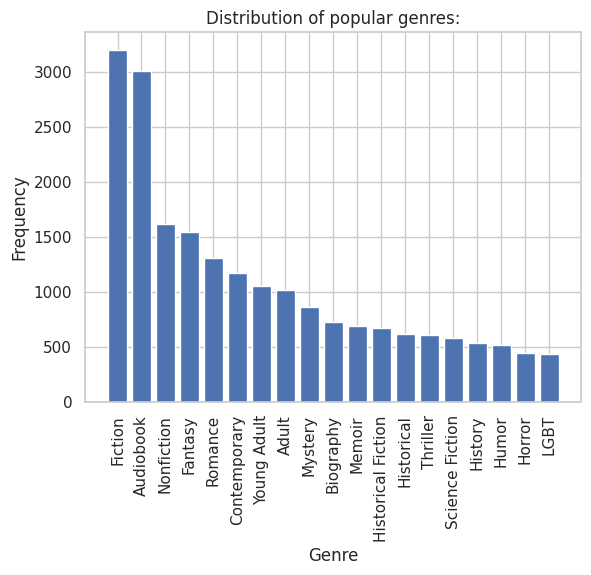

In [133]:
# 5. Genre Analysis
genres = df["genres"].str.split("|").values
genres = np.hstack(genres)
genres, frequency = np.unique(genres, return_counts=True)

print("Number of genres:", genres.size)

popular_genres = frequency.argsort()[:-20:-1]

fig, axes = plt.subplots()
axes.bar(genres[popular_genres], frequency[popular_genres])
axes.set_title("Distribution of popular genres")
axes.set_xlabel("Genre")
axes.set_ylabel("Frequency")
axes.tick_params(axis='x', rotation=90)
plt.show()



Numerical Feature Distributions:


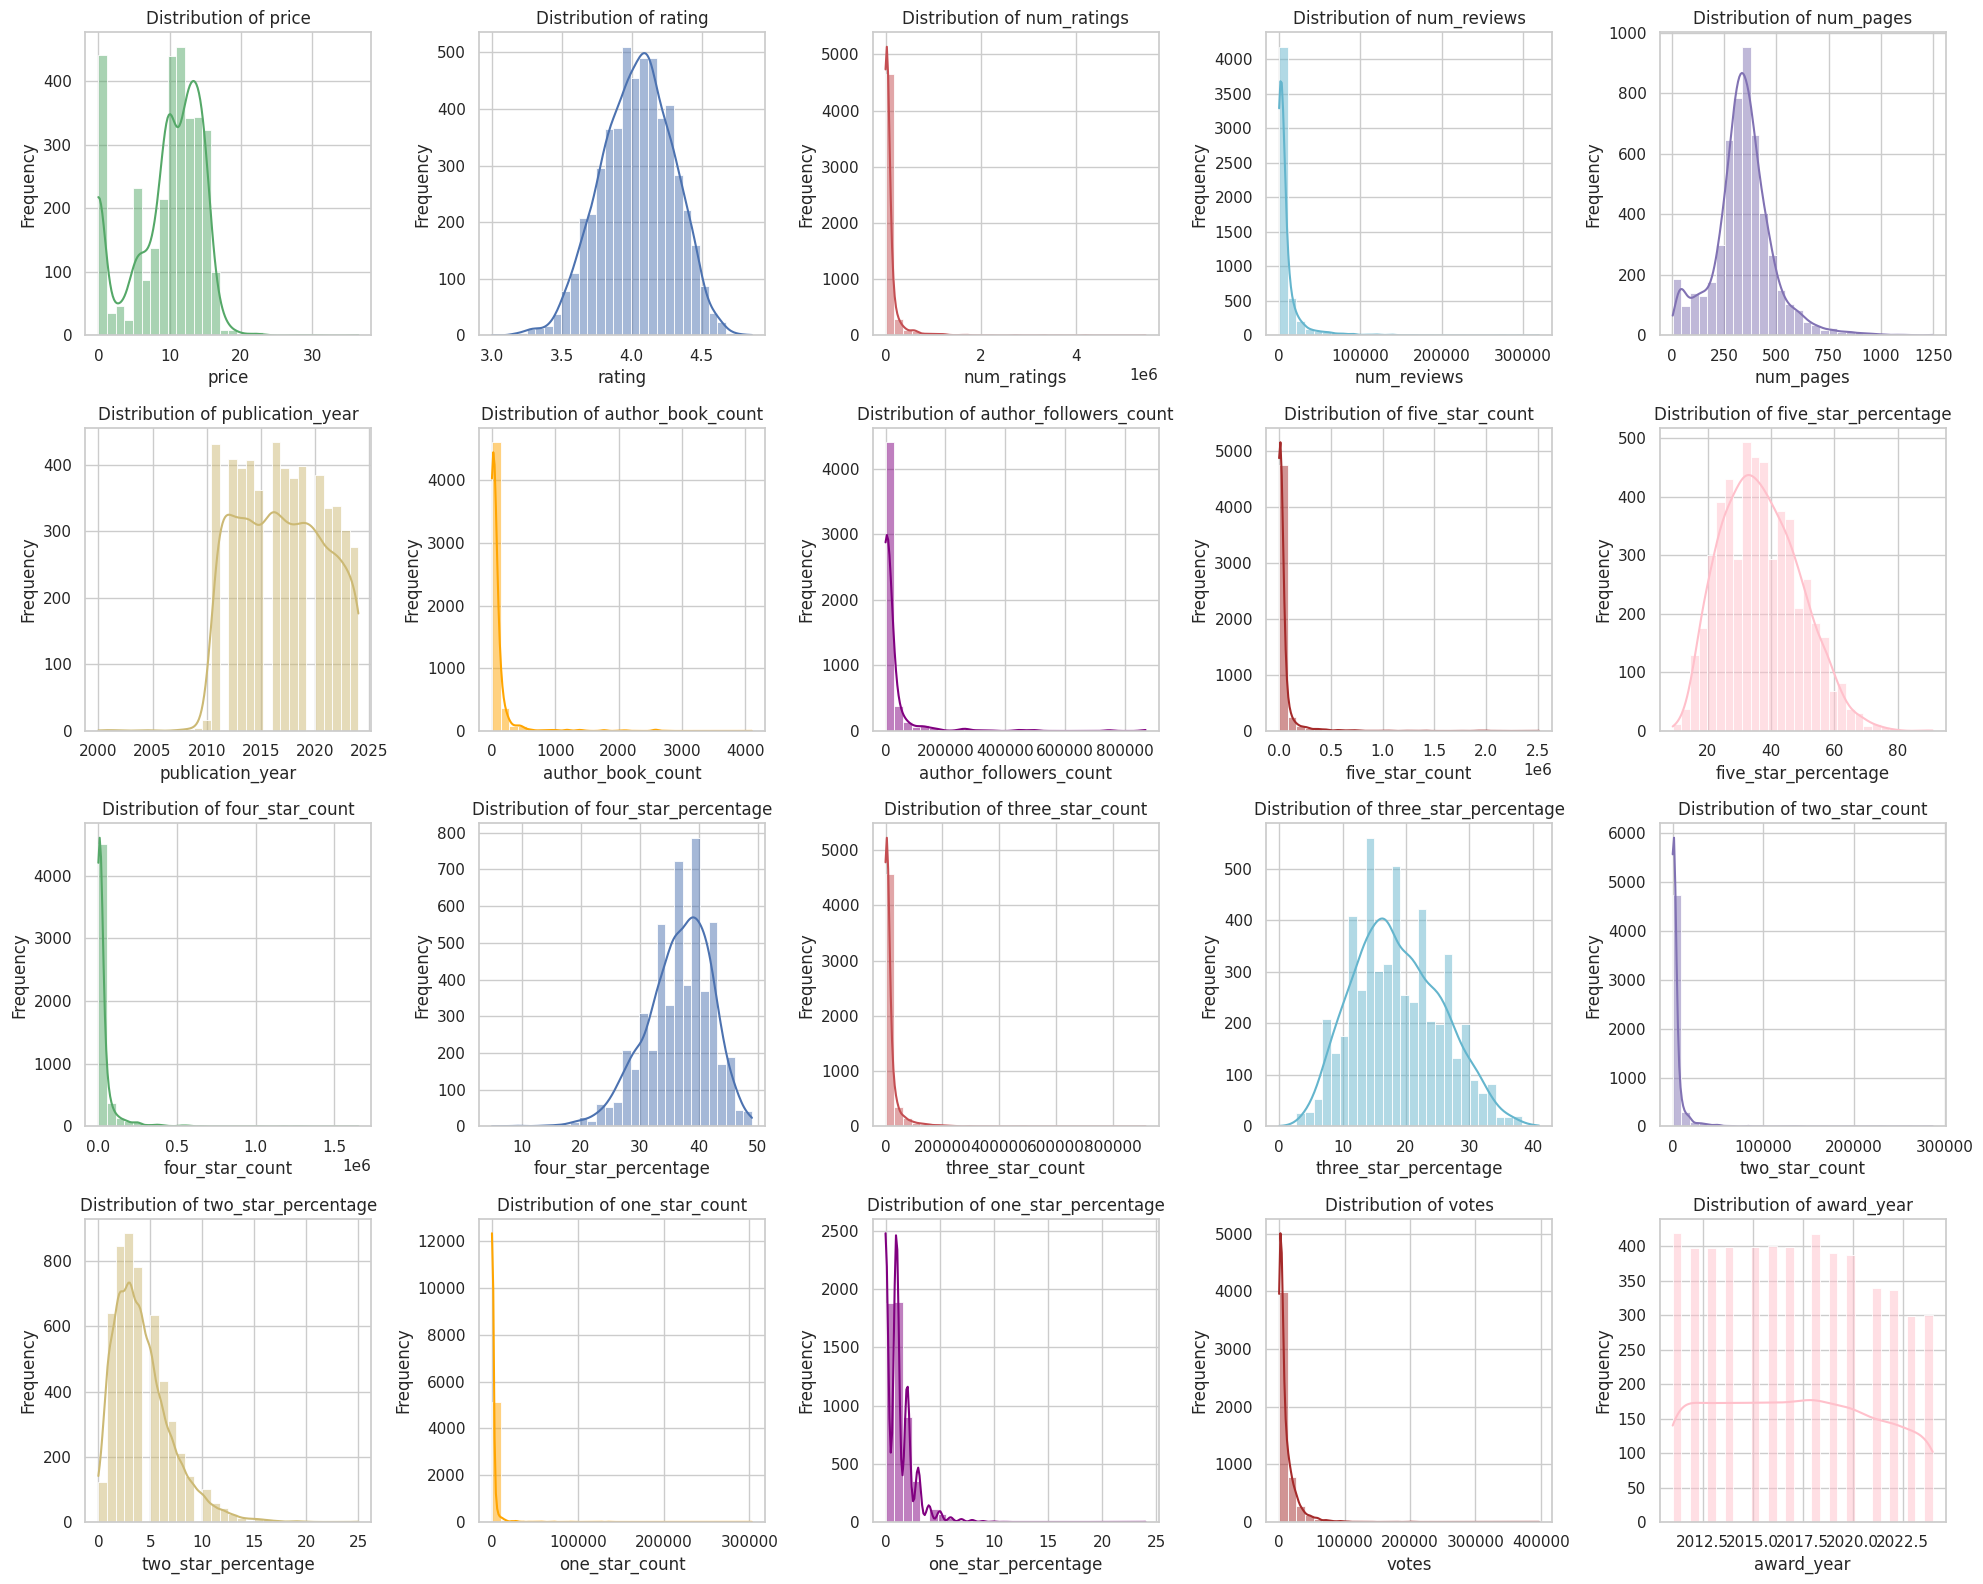


Outlier Visualization for Numerical Features:


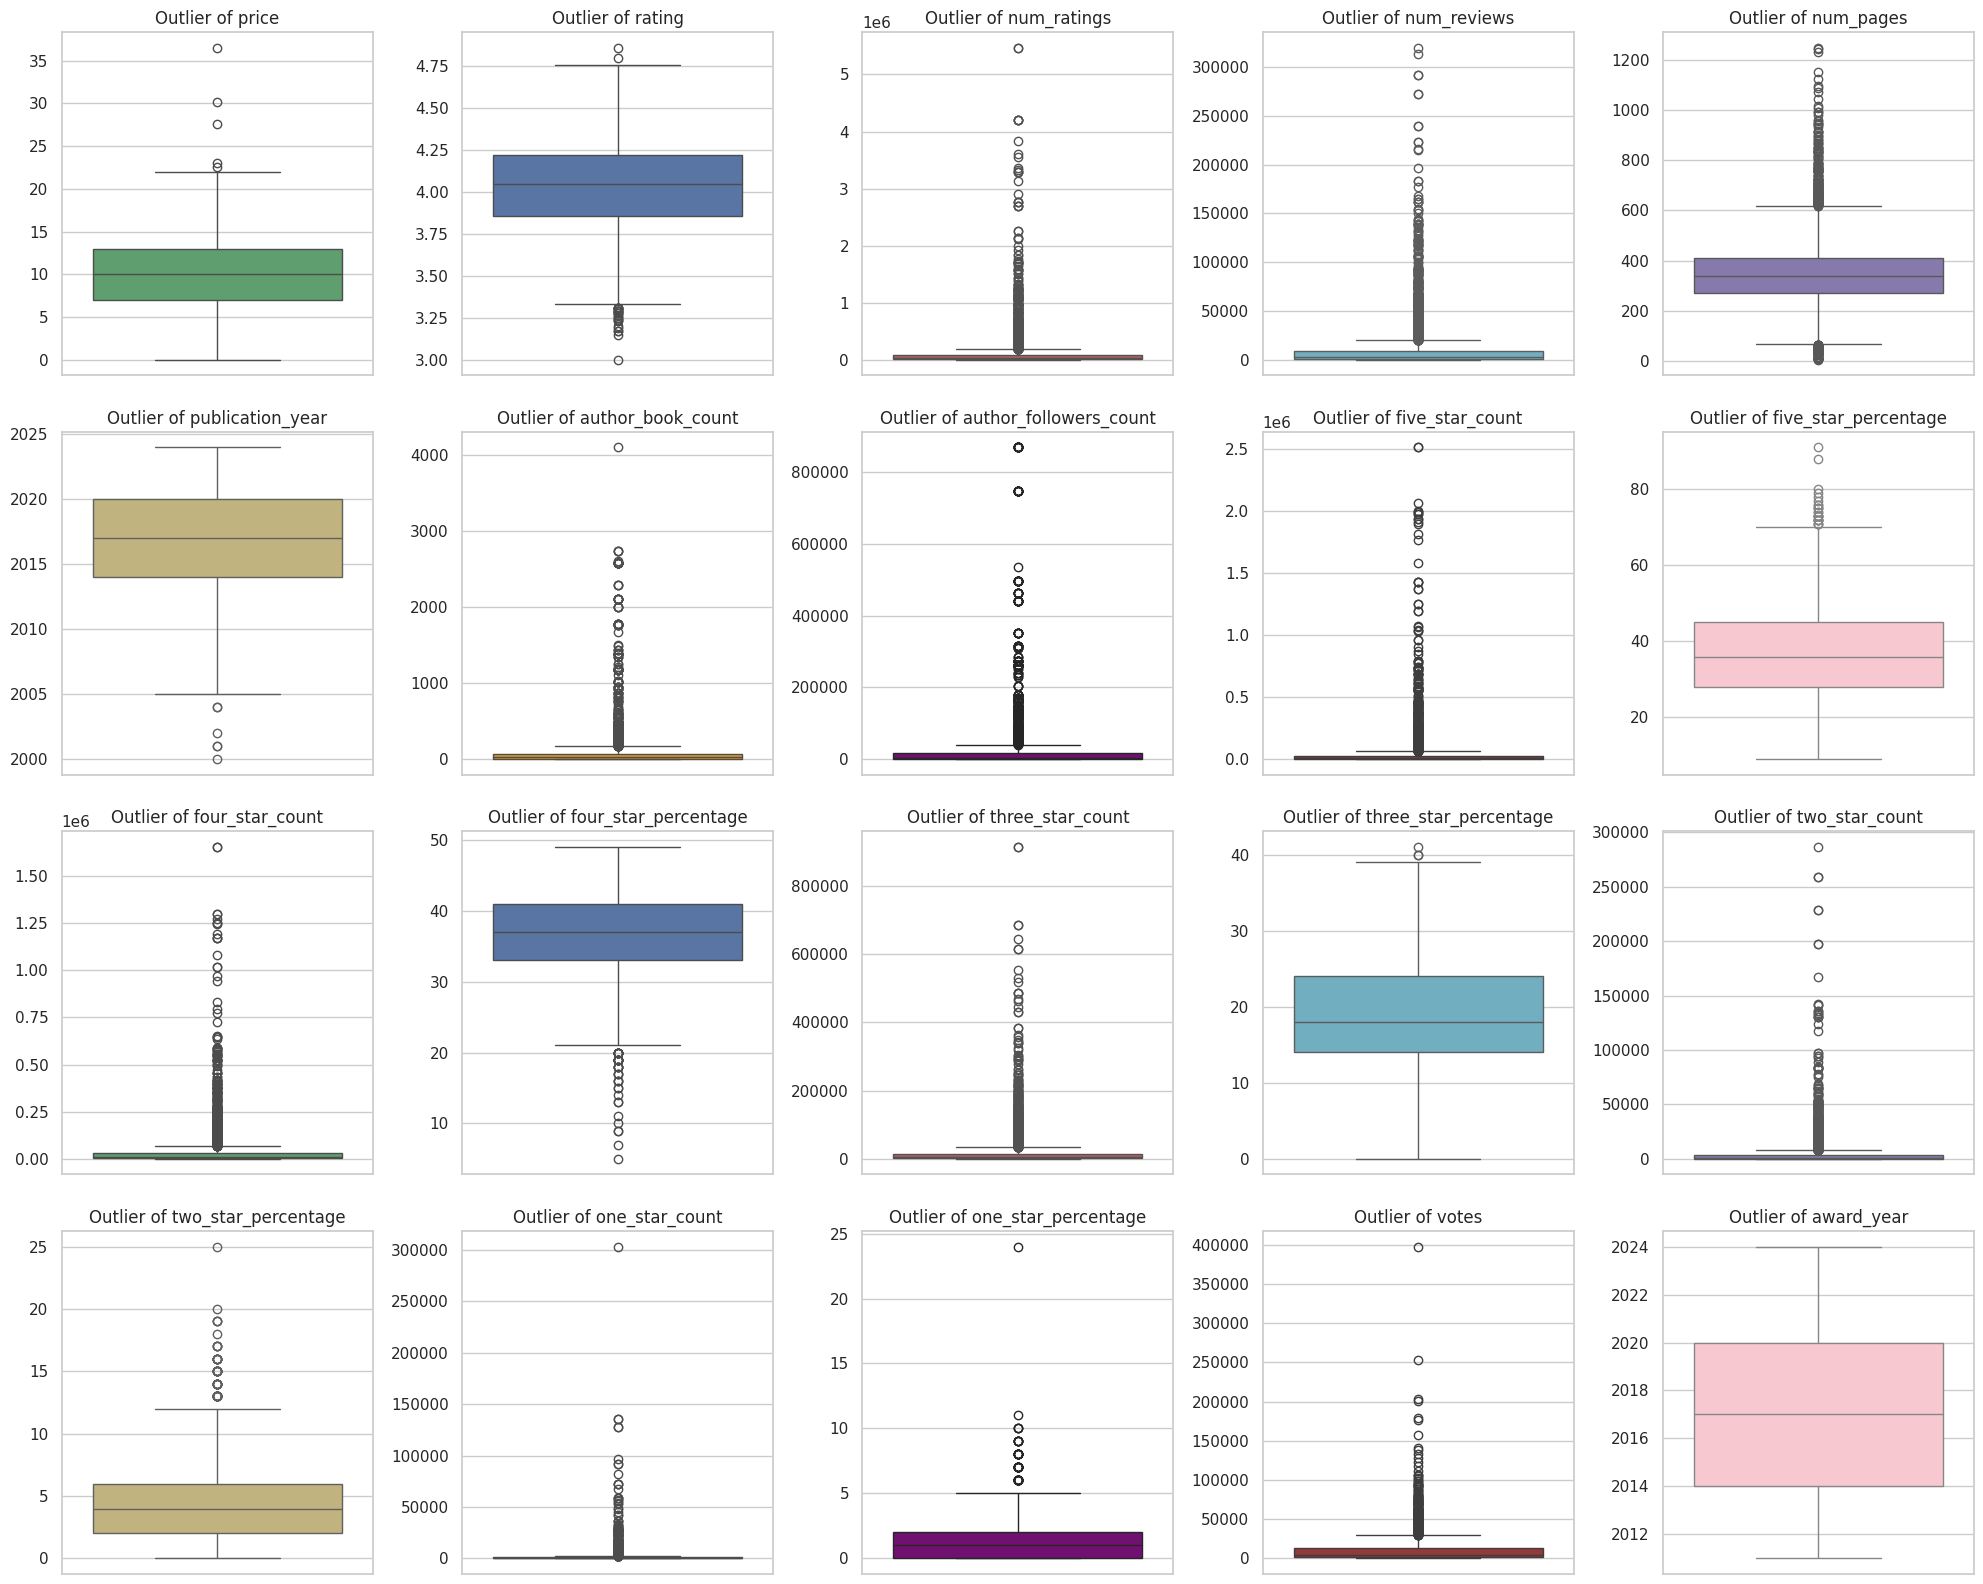

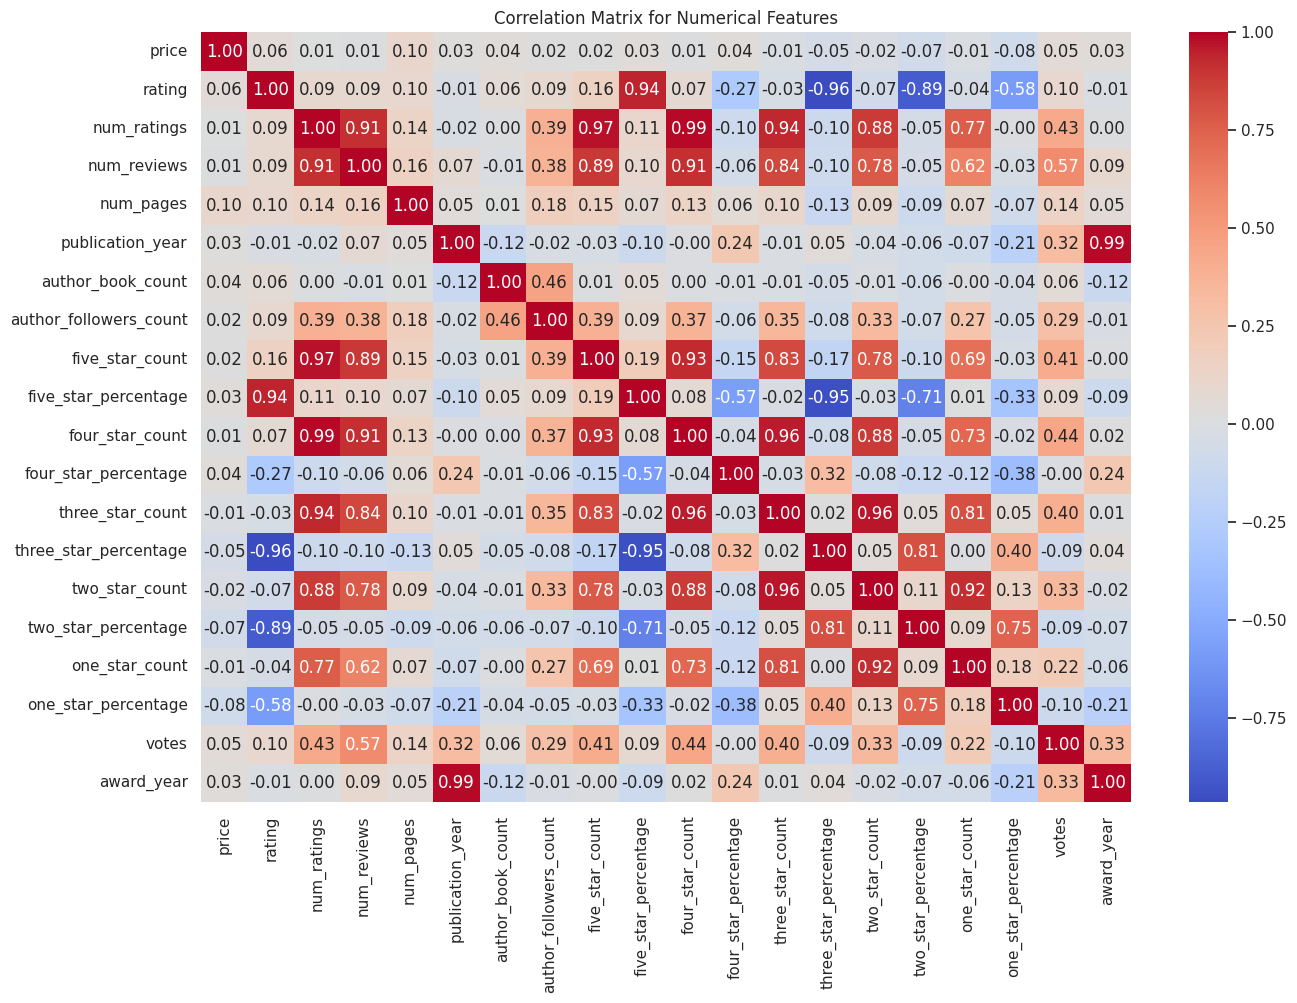

In [10]:
# 6. Visualization

# 6.1 Distribution
colors = ['g', 'b', 'r', 'c', 'm', 'y', 'orange', 'purple', 'brown', 'pink']
df_columns = df.columns
categorical_features = ['title', 'genres', 'category', 'author']
numerical_features = [col for col in df_columns if col not in categorical_features]

num_features = len(numerical_features)
n_cols = 5
n_rows = math.ceil(num_features / n_cols)

# Subplot for numerical features
print("\nNumerical Feature Distributions:")
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows))
axes = axes.flatten()

for idx, col in enumerate(numerical_features):
    sns.histplot(df[col], bins=30, kde=True, color=colors[idx % len(colors)], ax=axes[idx])
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')

for idx in range(num_features, len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

# 6.2 Visualize outliers
print("\nOutlier Visualization for Numerical Features:")
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows))
axes = axes.flatten()

for idx, col in enumerate(numerical_features):
    sns.boxplot(y=df[col], color=colors[idx % len(colors)], ax=axes[idx])
    axes[idx].set_title(f'Outlier of {col}')
    axes[idx].set_ylabel('')

for idx in range(num_features, len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

# 6.3 Correlation Matrix
features_for_corr = numerical_features

plt.figure(figsize=(15, 10))
corr = df[features_for_corr].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix for Numerical Features')
plt.show()